# < Question >

In Titanic Data, it contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. In next cell, there are detail description of data from the source. My fundamental question have started from the survivors. Based on the survival data and each variable, the observation will be focused on the correlation of each factor, and how each variable has had affected the chance of survival in the incident. Specifically, variables such as ticket class, sex, age, and onboard family relationship are being analyzed in terms of survival. 

# < Data Description >


### - Data Dictionary (Variable, Definition, Key)

| Variable   | Definition                                  | Key                                              |
|------------|---------------------------------------------|--------------------------------------------------|
| survival   | Survival                                    | 0 = No, 1 = Yes                                  |
| pclass     | Ticket class                                | 1 = 1st, 2 = 2nd, 3 = 3rd                        |
| sex        | Sex                                         |                                                  |
| Age        | Age in years                                |                                                  |
| sibsp      | # of siblings / spouses around the Titanic  |                                                  |
| parch      | # of parents / children aboard the Titanic  |                                                  |
| ticket     | Ticket number                               |                                                  |
| fare       | Passenger fare                              |                                                  |
| cabin      | Cabin number                                |                                                  |
| embarked   | Port of Embarkation                         | C = Cherbourg, Q = Queenstown, S = Southampton   |

### - Variable Notes
- pclass: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
        - Some children travelled only with a nanny, therefore parch=0 for them.

Source From: https://www.kaggle.com/c/titanic/data

# < Data Wrangle >

## 1. Exploring Survivors with Each Ticket Class

In [1]:
##Import pandas, numpy, matplotlib, seaborn, patches
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
#Root file location
filename = 'titanic-data.csv'

#Retrieve csv file location and read csv file as Dataframe
raw_df = pd.read_csv(filename)

#Create a new dataframe with necessary information from the dataset
titanic_df = pd.DataFrame({
    'Ticket_Class': raw_df['Pclass'].values,
    'Survived': raw_df['Survived'].values
}, index=raw_df['PassengerId'])

#Check the total of rows to match 891 passengers
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 2 columns):
Survived        891 non-null int64
Ticket_Class    891 non-null int64
dtypes: int64(2)
memory usage: 20.9 KB
None


In [3]:
#A brief testing to visually see how the data is distributed through histogram
ax = titanic_df['Ticket_Class'].hist(bins=3, align="mid")

#Set x and y lables, and title
ax.set_ylabel('Number of Passengers')
ax.set_xlabel('Ticket Classes')
ax.set_title("Passengers' Histogram with Ticket Classes")
ax.set_xticks([1, 2, 3])

#Same step as previous one to check how data looks
pd.DataFrame(titanic_df['Ticket_Class'].describe())


,Ticket_Class
count,891.000000
mean,2.308642
std,0.836071
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


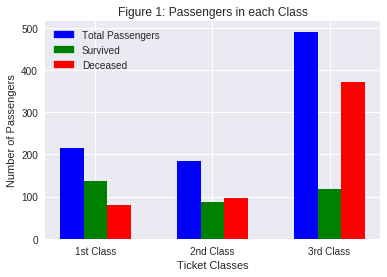

In [4]:
%matplotlib inline

#Group the data by the specific column and return the count of the dataset
#Make a list based on that new grouped data for plotting
total_by_classes = titanic_df.groupby('Ticket_Class').count()
temp1 = list(total_by_classes.values.flatten())

#Group the data by the specific column and return the count of the filtered dataset
#Make a list based on that new grouped data for plotting
survived_by_classes = titanic_df[titanic_df.Survived == 1].groupby('Ticket_Class').count()
temp2 = list(survived_by_classes.values.flatten())

#Group the data by the specific column and return the count of the filtered dataset
#Make a list based on that new grouped data for plotting
deceased_by_classes = titanic_df[titanic_df.Survived == 0].groupby('Ticket_Class').count()
temp3 = list(deceased_by_classes.values.flatten())

#Plot the bar graph
xaxis = np.array([1, 2, 3]) #number of axis
plt.xlabel('Ticket Classes')  #X-axis label
plt.ylabel('Number of Passengers') #Y-axis label
plt.title("Figure 1: Passengers in each Class") #Chart title
plt.xticks([1,2,3], ['1st Class', '2nd Class', '3rd Class']) #Rename the X-axis

#Divide the current figure into an m-by-n grid
#Plot the graph based on each list above
ax = plt.subplot(111)
ax.bar(xaxis-0.2, temp1, width=0.2, color ='b', align='center')
ax.bar(xaxis, temp2, width=0.2, color ='g', align='center')
ax.bar(xaxis+0.2, temp3, width=0.2, color ='r', align='center')

#Insert legend with color coding for information
blue_patch = mpatches.Patch(color='blue', label='Total Passengers')
green_patch = mpatches.Patch(color='green', label='Survived')
red_patch = mpatches.Patch(color='red', label='Deceased')
plt.legend(loc = 'upper left', handles=[blue_patch, green_patch, red_patch])

#Show the graph
plt.show()

In [5]:
#Combine pre-existing table into a single table
concat_tables_classes = pd.concat([total_by_classes, survived_by_classes, deceased_by_classes], axis=1)
concat_tables_classes.columns = ['Total Passengers', 'Survived', 'Deceased']
print(concat_tables_classes)

#Define a function to convert a series to percentages
def convert_percent(series):
    if series.iloc[0] == 0:
        return 0
    return round((series / series.iloc[0]) * 100, 2)

#Apply a function to each row
df_classes_survival_ratio = concat_tables_classes.apply(convert_percent, axis = 1)
print(df_classes_survival_ratio)

              Total Passengers  Survived  Deceased
Ticket_Class                                      
1                          216       136        80
2                          184        87        97
3                          491       119       372
              Total Passengers  Survived  Deceased
Ticket_Class                                      
1                        100.0     62.96     37.04
2                        100.0     47.28     52.72
3                        100.0     24.24     75.76


### a. Observations from Each Ticket Class

Based on Figure 1 above, there are some noticeable observations related to ticket classes and survivor rates. More than half of passengers in the 1st class have survived from the incident. Compared to that, 3rd class passengers have shown much less survival rate compared to the first class. Also, red bar graphs that indicate the rate of deceased have shown a gradual increase as the ticket class changed from the 1st to 3rd. The percentages in the data frame shows this tendency (in df_classes_survival_ratio). 

Throughout the research, I have found different ways of performing statics tests in binary or categorical outcomes with proportions(in this case survival rate). According to Stanford University HRP258: Introduction to Probability and Statistics for Clinical Research by Kristin Sainani, it introduces several different ways such as Chi-square test, McNemar's chi-square, Relative risks, or Conditional logistic. Comparing the theoretical distribution, the overall survivor rate from the incident with each survival rate based on each factor(ticket classes, sex, etc) will test a goodness of fit.

Source From: 
1. web.stanford.edu/~kcobb/hrp258/lecture7.ppt
2. https://en.wikipedia.org/wiki/Chi-squared_test
3. https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test

### b. Chi-Square Test
- To perform chi-square test, the overall survival rate should be calculated with all passengers of 891.

In [6]:
#Apply a function to each column
sum_classes_df = concat_tables_classes.apply(sum, axis=0)

#Get the total values for each series to find overall rate
total_passengers, survivors, deceased = sum_classes_df.iloc[0], sum_classes_df.iloc[1], sum_classes_df.iloc[2] 
overall_survival_rate = round(survivors / total_passengers, 2)
overall_deceased_rate = round(deceased / total_passengers, 2)

Before calculating chi-square as below, there should be some pre-works done such as calculating degree of freedom, and making hypothesis statements within the significance level.
$$\chi_{df}^2 = \sum \frac{(observed-expected)^2}{expected}$$


- Degree of Freedom: Since the data set has three rows and two columns as below, the degree of freedom should be 2. 
    $$(number\_ of\_rows - 1)*(number\_of\_columns -1) = (3-1)*(2-1)=2$$

| Ticket_Class | Deceased   | Survived   |
|--------------|------------|------------|
| 1.0          | 80         | 136        |
| 2.0          | 97         | 87         |
| 3.0          | 372        | 119        |

With the degree of freedom, I need to find the critical value at 95% significance level. Based on the chi-square distribution table, the upper-tail critical values gives the value of 5.99 at 95% significance level. 

<img src="images/chi-sqaure distribution table.PNG" />

These are my hypothesis for the chi-squared test;

- $H_0:$ The average survival rate of whole dataset (38%) will be similarly applied in different ticket classes respectively at 95% significance level. In other words, the difference in survival rates in each ticket class comparing with all passengers survival rate is not significantly different, but actually staying within the confidence intervals of whole passengers survival rate.


- $H_A:$ The alternative hypothesis is the survival rate of each ticket class will be different from the whole passengers survival rate at 95% significance level. In this case, the difference in survival rates in each class comparing with all passengers survival rate is significantly different. Hence, the different ticket classes can affect the survival rate which is different from the overall survivor rate.

Source From: http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG
http://stattrek.com/chi-square-test/independence.aspx?Tutorial=AP

In [7]:
#Define a function to calculate chi_square
def chi_square(row):
    total, survivor, deceased = map(lambda x: x, row)
    if total == 0:
        return 0
    sur = ((survivor - (total * 0.38))**2) / (total * 0.38)
    dec = ((deceased - (total * 0.62))**2) / (total * 0.62)
    return sur + dec

#Apply a function to each row
df_chi_square = concat_tables_classes.apply(chi_square, axis = 1)
print(df_chi_square)
print("\nThe sum of chi-squared test:", round(df_chi_square.sum(),2))


Ticket_Class
1    57.130856
2     6.729497
3    39.480223
dtype: float64

The sum of chi-squared test: 103.34


### c. Findings from Survivors & Ticket Classes

As a result, the sum of chi-squared test is 103.34 which is much greater than the upper-tail critical value 5.99 at 95% significance level. Therefore, it rejects the null hypothesis, so the the average survival rate of each ticket class will be significantly different from the whole passengers survival rate at 95% significance level. Based on this test result, three different ticket classes can cause different survival rate in the incident. In this case, the rate of survival tends to increase as the ticket class goes up from the thrid to first.

## 2. Exploring Survivors from Each Sex

In [8]:
#Create a new dataframe with necessary information from the dataset
titanic_sex_df = pd.DataFrame({
    'Sex': raw_df['Sex'].values,
    'Survived': raw_df['Survived'].values
}, index=raw_df['PassengerId'])

#Check the total of rows to match 891 passengers
print(titanic_sex_df.count())

Sex         891
Survived    891
dtype: int64


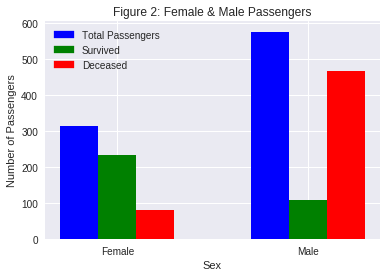

In [9]:
%matplotlib inline

#Group the data by the specific column and return the count of the dataset
#Make a list based on that new grouped data for plotting
total_by_sex = titanic_sex_df.groupby('Sex').count()
temp1 = list(total_by_sex.values.flatten())

#Group the data by the specific column and return the count of the filtered dataset
#Make a list based on that new grouped data for plotting
survived_by_sex = titanic_sex_df[titanic_sex_df.Survived == 1].groupby('Sex').count()
temp2 = list(survived_by_sex.values.flatten())

#Group the data by the specific column and return the count of the filtered dataset
#Make a list based on that new grouped data for plotting
deceased_by_sex = titanic_sex_df[titanic_sex_df.Survived == 0].groupby('Sex').count()
temp3 = list(deceased_by_sex.values.flatten())

#Plot the bar graph
xaxis = np.array([1, 2]) #number of axis
plt.xlabel('Sex')  #X-axis label
plt.ylabel('Number of Passengers') #Y-axis label
plt.title("Figure 2: Female & Male Passengers") #Chart title
plt.xticks([1,2], ['Female', 'Male']) #Rename the X-axis

#Divide the current figure into an m-by-n grid
#Plot the graph based on each list above
ax = plt.subplot(111)
ax.bar(xaxis-0.2, temp1, width=0.2, color ='b', align='center')
ax.bar(xaxis, temp2, width=0.2, color ='g', align='center')
ax.bar(xaxis+0.2, temp3, width=0.2, color ='r', align='center')

#Insert legend with color coding for information
blue_patch = mpatches.Patch(color='blue', label='Total Passengers')
green_patch = mpatches.Patch(color='green', label='Survived')
red_patch = mpatches.Patch(color='red', label='Deceased')
plt.legend(loc = 'upper left', handles=[blue_patch, green_patch, red_patch])

#Show the graph
plt.show()


In [10]:
#Combine pre-existing table into a single table
concat_tables_sex = pd.concat([total_by_sex, survived_by_sex, deceased_by_sex], axis=1)
concat_tables_sex.columns = ['Total Passengers', 'Survived', 'Deceased']
print(concat_tables_sex)

#Apply a function to each row
df_sex_survival_ratio = concat_tables_sex.apply(convert_percent, axis = 1)
print(df_sex_survival_ratio)


        Total Passengers  Survived  Deceased
Sex                                         
female               314       233        81
male                 577       109       468
        Total Passengers  Survived  Deceased
Sex                                         
female             100.0     74.20     25.80
male               100.0     18.89     81.11


### a. Observations from Each Sex

Based on Figure 2 above, there are some remarkable difference in survivor rates in each sex. Based on df_sex_survival_ratio, nearly three out of four female passengers have survived from the incident. On the other hand, one out of five male passengers have survived from the same incident. Since the variable has changed with different factors and result stays as same(survival), I will perform chi-square test for this variable as well.

### b. Chi-Square Test

Before calculating chi-square as below, there should be some pre-works done such as calculating degree of freedom, and making hypothesis statements within the significance level.

- Degree of Freedom: Since the data set has two rows and two columns as below, the degree of freedom should be 1. 
    $$(number\_ of\_rows - 1)*(number\_of\_columns -1) = (2-1)*(2-1)=1$$

| Sex          | Deceased   | Survived   |
|--------------|------------|------------|
| Female       | 81         | 233        |
| Male         | 468        | 109        |

With the degree of freedom, I need to find the critical value at 95% significance level. Based on the chi-square distribution table, the upper-tail critical values gives the value of 3.84 at 95% significance level. 

These are my hypothesis for the chi-squared test;

- $H_0:$ The average survival rate of whole dataset (38%) will be similarly applied in each sex respectively at 95% significance level. In other words, the difference in survival rates in each sex comparing with all passengers survival rate is not significantly different, but actually staying within the confidence intervals of whole passengers survival rate.


- $H_A:$ The alternative hypothesis is the average survival rate of each sex will be different from the whole passengers survival rate at 95% significance level. In this case, the difference in survival rates in each sex comparing with all passengers survival rate is significantly different. Hence, the different sex can affect the survival rate which is different from the overall survivor rate.

In [11]:
#Apply a function to each row
df_chi_square_sex = concat_tables_sex.apply(chi_square, axis = 1)
print(df_chi_square_sex)
print("\nThe sum of chi-squared test:", round(df_chi_square_sex.sum(),2))

Sex
female    174.688049
male       89.430339
dtype: float64

The sum of chi-squared test: 264.12


### c. Findings from Survivors & Each Sex

As a result, the sum of chi-squared test is 264.12 which is much greater than the upper-tail critical value 3.84 at 95% significance level. Therefore, it rejects the null hypothesis, so the the average survival rate of each ticket class will be significantly different from the whole passengers survival rate at 95% significance level. Based on this test result, each sex has different survival rate in the incident. In this case, the rate of survival tends to increase for the female group compared to the male group.

## 3. Exploring Survivors with Different Age Groups

In [12]:
#Create a new dataframe with necessary information from the dataset
titanic_age_df = raw_df[['Age', 'Survived']]
#titanic_age_df = pd.DataFrame({
#    'Age': raw_df['Age'].values,
#    'Survived': raw_df['Survived'].values
#}, index=raw_df['PassengerId'])

#Check the total of rows to match 891 passengers
print(titanic_age_df.count())

Age         714
Survived    891
dtype: int64


In the dataset, there are 177 records with no age information with blanks. For further process, the analysis is based on the 714 records with the present values. I have tried to make a seperate group for empty values, but due to its large portion from total of 891 records, it has possibility of affecting chi-squared test. Therefore, the null values are removed from the next process. 

Age
Survived                
0        mean  30.626179
         std   14.172110
1        mean  28.343690
         std   14.950952

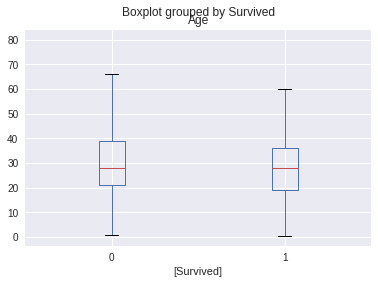

In [13]:
titanic_age_df.boxplot(column=['Age'], by = ['Survived'])
pd.DataFrame(titanic_age_df.groupby(['Survived'])['Age'].describe().loc[:, ['mean', 'std']])

The average and standard deviation of age group for survived and deceased share almost same values. In detail, the survival group shows lower max value. This kind of difference has slightly reduced the mean value the table shows. From this quick testing with data visualization, I can get a glimpse of age can affect the survival rate. 

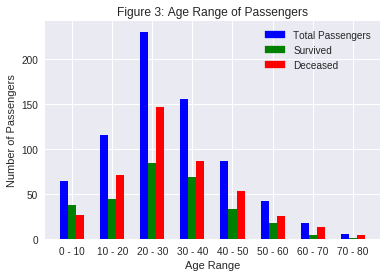

In [14]:
%matplotlib inline

#Group the data by the specific column and return the count of the dataset
#Make a list based on that new grouped data for plotting
titanic_age_range_df = titanic_age_df.groupby(pd.cut(titanic_age_df['Age'], range(0, 90, 10))).count()
age_by_range = titanic_age_range_df['Age'].values
temp1 = list(age_by_range)

#Group the data by the specific column and return the count of the filtered dataset
#Make a list based on that new grouped data for plotting
survived_age_filtered = titanic_age_df[titanic_age_df.Survived == 1]
survived_filtered_age_range = survived_age_filtered.groupby(pd.cut(survived_age_filtered['Age'], range(0, 90, 10))).count()
survived_age_by_range = survived_filtered_age_range['Age'].values
temp2 = list(survived_age_by_range)

#Group the data by the specific column and return the count of the filtered dataset
#Make a list based on that new grouped data for plotting
deceased_age_filtered = titanic_age_df[titanic_age_df.Survived == 0]
deceased_filtered_age_range = deceased_age_filtered.groupby(pd.cut(deceased_age_filtered['Age'], range(0, 90, 10))).count()
deceased_age_by_range = deceased_filtered_age_range['Age'].values
temp3 = list(deceased_age_by_range)

#Plot the bar graph
xaxis = np.array([1, 2, 3, 4, 5, 6, 7, 8]) #number of axis
plt.xlabel('Age Range')  #X-axis label
plt.ylabel('Number of Passengers') #Y-axis label
plt.title("Figure 3: Age Range of Passengers") #Chart title
plt.xticks([1,2,3,4,5,6,7,8], ['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', \
                               '60 - 70', '70 - 80']) #Rename the X-axis

#Divide the current figure into an m-by-n grid
#Plot the graph based on each list above
ax = plt.subplot(111)
ax.bar(xaxis-0.2, temp1, width=0.2, color ='b', align='center')
ax.bar(xaxis, temp2, width=0.2, color ='g', align='center')
ax.bar(xaxis+0.2, temp3, width=0.2, color ='r', align='center')

#Insert legend with color coding for information
blue_patch = mpatches.Patch(color='blue', label='Total Passengers')
green_patch = mpatches.Patch(color='green', label='Survived')
red_patch = mpatches.Patch(color='red', label='Deceased')
plt.legend(loc = 'upper right', handles=[blue_patch, green_patch, red_patch])

#Show the graph
plt.show()


### a. Observations from Different Age Groups

Based on Figure 3 above, there are not much noticeable observations related to age ranges and survivor rates. The only group that has higher survivor rate compared to deceased group is age from 0-10. Furthermore, the age group between 60 and 80 shows lower survival rates compared to all other groups. Other than that, the survival rates show not much of difference.

### b. Chi-Square Test

Before calculating chi-square as below, there should be some pre-works done such as calculating degree of freedom, and making hypothesis statements within the significance level.
$$\chi_{df}^2 = \sum \frac{(observed-expected)^2}{expected}$$


- Degree of Freedom: Since the data set has eight rows and two columns as below, the degree of freedom should be 2. 
    $$(number\_ of\_rows - 1)*(number\_of\_columns -1) = (8-1)*(2-1)=7$$

In [15]:
#Combine pre-existing table into a single table
concat_tables_age = pd.concat([titanic_age_range_df['Age'], survived_filtered_age_range['Age'], \
                               deceased_filtered_age_range['Age']], axis=1)
concat_tables_age.columns = ['Total Passengers', 'Survived', 'Deceased']
print(concat_tables_age)

#Apply a function to each row
df_age_survival_ratio = concat_tables_age.apply(convert_percent, axis = 1)
print(df_age_survival_ratio)

          Total Passengers  Survived  Deceased
Age                                           
(0, 10]                 64        38        26
(10, 20]               115        44        71
(20, 30]               230        84       146
(30, 40]               155        69        86
(40, 50]                86        33        53
(50, 60]                42        17        25
(60, 70]                17         4        13
(70, 80]                 5         1         4
          Total Passengers  Survived  Deceased
Age                                           
(0, 10]              100.0     59.38     40.62
(10, 20]             100.0     38.26     61.74
(20, 30]             100.0     36.52     63.48
(30, 40]             100.0     44.52     55.48
(40, 50]             100.0     38.37     61.63
(50, 60]             100.0     40.48     59.52
(60, 70]             100.0     23.53     76.47
(70, 80]             100.0     20.00     80.00


With the degree of freedom, I need to find the critical value at 95% significance level. Based on the chi-square distribution table, the upper-tail critical values gives the value of 14.07 at 95% significance level. 

These are my hypothesis for the chi-squared test;

- $H_0:$ The average survival rate of whole dataset (38%) will be similarly applied in different age groups respectively at 95% significance level. In other words, the difference in survival rates in each age group comparing with all passengers survival rate is not significantly different, but actually staying within the confidence intervals of whole passengers survival rate.


- $H_A:$ The alternative hypothesis is the average survival rate of each age group will be different from the whole passengers survival rate at 95% significance level. In this case, the difference in survival rates in each age group comparing with all passengers survival rate is significantly different. Hence, the different age groups can affect the survival rate which are different from the overall survivor rate.

In [16]:
#Apply a function to each row
df_chi_square_age = concat_tables_age.apply(chi_square, axis = 1)
print(df_chi_square_age)
print("\nThe sum of chi-squared test:", round(df_chi_square_age.sum(),2))

Age
(0, 10]     12.411290
(10, 20]     0.003322
(20, 30]     0.213331
(30, 40]     2.793417
(40, 50]     0.005054
(50, 60]     0.109306
(60, 70]     1.510936
(70, 80]     0.687606
dtype: float64

The sum of chi-squared test: 17.73


### c. Findings from Survivors & Different Age Groups

As a result, the sum of chi-squared test is 17.73 which is greater than the upper-tail critical value 14.07 at 95% significance level. Therefore, it rejects the null hypothesis, so the the average survival rate of each age group will be significantly different from the whole passengers survival rate at 95% significance level. Based on this test result, different age groups can cause different survival rate in the incident.


## 4. Exploring Survivors with Onboard Siblings/Spouses

In [17]:
titanic_sibsp_df = pd.DataFrame({
    'SibSp': raw_df['SibSp'].values,
    'Survived': raw_df['Survived'].values
}, index=raw_df['PassengerId'])

#Check the total of rows to match 891 passengers
print(titanic_sibsp_df.count())

SibSp       891
Survived    891
dtype: int64


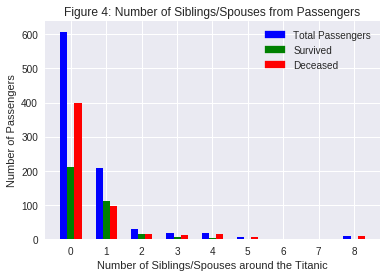

In [18]:
%matplotlib inline

#Group the data by the specific column and return the count of the dataset
#Make a list based on that new grouped data for plotting
titanic_sibsp_range_df = titanic_sibsp_df.groupby(pd.cut(titanic_sibsp_df['SibSp'], [-1,0,1,2,3,4,5,6,7,8])).count()
sibsp_by_range = titanic_sibsp_range_df['SibSp'].values
temp1 = list(sibsp_by_range)

#Group the data by the specific column and return the count of the filtered dataset
#Make a list based on that new grouped data for plotting
survived_sibsp_filtered = titanic_sibsp_df[titanic_sibsp_df.Survived == 1]
survived_filtered_sibsp_range = survived_sibsp_filtered.groupby(pd.cut(survived_sibsp_filtered['SibSp'], \
                                                                       [-1,0,1,2,3,4,5,6,7,8])).count()
survived_sibsp_by_range = survived_filtered_sibsp_range['SibSp'].values
temp2 = list(survived_sibsp_by_range)

#Group the data by the specific column and return the count of the filtered dataset
#Make a list based on that new grouped data for plotting
deceased_sibsp_filtered = titanic_sibsp_df[titanic_sibsp_df.Survived == 0]
deceased_filtered_sibsp_range = deceased_sibsp_filtered.groupby(pd.cut(deceased_sibsp_filtered['SibSp'], \
                                                                       [-1,0,1,2,3,4,5,6,7,8])).count()
deceased_sibsp_by_range = deceased_filtered_sibsp_range['SibSp'].values
temp3 = list(deceased_sibsp_by_range)

#Plot the bar graph
xaxis = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]) #number of axis
plt.xlabel('Number of Siblings/Spouses around the Titanic')  #X-axis label
plt.ylabel('Number of Passengers') #Y-axis label
plt.title("Figure 4: Number of Siblings/Spouses from Passengers") #Chart title
plt.xticks([1,2,3,4,5,6,7,8,9], [0, 1, 2, 3, 4, 5, 6, 7, 8]) #Rename the X-axis

#Divide the current figure into an m-by-n grid
#Plot the graph based on each list above
ax = plt.subplot(111)
ax.bar(xaxis-0.2, temp1, width=0.2, color ='b', align='center')
ax.bar(xaxis, temp2, width=0.2, color ='g', align='center')
ax.bar(xaxis+0.2, temp3, width=0.2, color ='r', align='center')

#Insert legend with color coding for information
blue_patch = mpatches.Patch(color='blue', label='Total Passengers')
green_patch = mpatches.Patch(color='green', label='Survived')
red_patch = mpatches.Patch(color='red', label='Deceased')
plt.legend(loc = 'upper right', handles=[blue_patch, green_patch, red_patch])

#Show the graph
plt.show()

### a. Observations from Onboard Siblings/Spouses

Based on Figure 4 above, there are some noticeable observations related to number of siblings/spouses and survivor rates. As the number increases, the chance of survival decreases. Also, the majority of passengers have had a single sibiling or spouse.

### b. Chi-Square Test

Before calculating chi-square as below, there should be some pre-works done such as calculating degree of freedom, and making hypothesis statements within the significance level.
$$\chi_{df}^2 = \sum \frac{(observed-expected)^2}{expected}$$


- Degree of Freedom: Since the data set has nine rows and two columns as below, the degree of freedom should be 2. 
    $$(number\_ of\_rows - 1)*(number\_of\_columns -1) = (9-1)*(2-1)=8$$

In [19]:
#Combine pre-existing table into a single table
concat_tables_sibsp = pd.concat([titanic_sibsp_range_df['SibSp'], survived_filtered_sibsp_range['SibSp'], \
                               deceased_filtered_sibsp_range['SibSp']], axis=1)
concat_tables_sibsp.columns = ['Total Passengers', 'Survived', 'Deceased']
print(concat_tables_sibsp)

#Apply a function to each row
df_sibsp_survival_ratio = concat_tables_sibsp.apply(convert_percent, axis = 1)
print(df_sibsp_survival_ratio)

         Total Passengers  Survived  Deceased
SibSp                                        
(-1, 0]               608       210       398
(0, 1]                209       112        97
(1, 2]                 28        13        15
(2, 3]                 16         4        12
(3, 4]                 18         3        15
(4, 5]                  5         0         5
(5, 6]                  0         0         0
(6, 7]                  0         0         0
(7, 8]                  7         0         7
         Total Passengers  Survived  Deceased
SibSp                                        
(-1, 0]             100.0     34.54     65.46
(0, 1]              100.0     53.59     46.41
(1, 2]              100.0     46.43     53.57
(2, 3]              100.0     25.00     75.00
(3, 4]              100.0     16.67     83.33
(4, 5]              100.0      0.00    100.00
(5, 6]                0.0      0.00      0.00
(6, 7]                0.0      0.00      0.00
(7, 8]              100.0      0.0

With the degree of freedom, I need to find the critical value at 95% significance level. Based on the chi-square distribution table, the upper-tail critical values gives the value of 15.51 at 95% significance level. 

These are my hypothesis for the chi-squared test;

- $H_0:$ The average survival rate of whole dataset (38%) will be similarly applied in different number of siblings/spouses respectively at 95% significance level. In other words, the difference in survival rates in each number of siblings/spouses comparing with all passengers survival rate is not significantly different, but actually staying within the confidence intervals of whole passengers survival rate.


- $H_A:$ The alternative hypothesis is the average survival rate of each number of siblings/spouses will be different from the whole passengers survival rate at 95% significance level. In this case, the difference in survival rates in each class comparing with all passengers survival rate is significantly different. Hence, the different number of sibilings/spouses can affect the survival rate which is different from the overall survivor rate.

In [20]:
#Apply a function to each row
df_chi_square_sibsp = concat_tables_sibsp.apply(chi_square, axis = 1)
print(df_chi_square_sibsp)
print("\nThe sum of chi-squared test:", round(df_chi_square_sibsp.sum(),2))

SibSp
(-1, 0]     3.090385
(0, 1]     21.556616
(1, 2]      0.844288
(2, 3]      1.147708
(3, 4]      3.477080
(4, 5]      3.064516
(5, 6]      0.000000
(6, 7]      0.000000
(7, 8]      4.290323
dtype: float64

The sum of chi-squared test: 37.47


### c. Findings from Survivors & Onboard Siblings/Spouses

As a result, the sum of chi-squared test is 37.47 which is much greater than the upper-tail critical value 15.51 at 95% significance level. Therefore, it rejects the null hypothesis, so the the average survival rate of each number of sibilings/spouses will be significantly different from the whole passengers survival rate at 95% significance level. Based on this test result, different numbers of sibilings/spouses can cause different survival rate in the incident. In this case, the rate of survival tends to increase in between one and two siblings/spouses.

## 5. Exploring Survivors with Onboard Parents/Children

In [21]:
titanic_parch_df = pd.DataFrame({
    'Parch': raw_df['Parch'].values,
    'Survived': raw_df['Survived'].values
}, index=raw_df['PassengerId'])

#Check the total of rows to match 891 passengers
print(titanic_parch_df.count())


Parch       891
Survived    891
dtype: int64


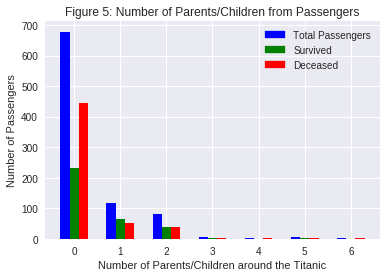

In [22]:
%matplotlib inline

#Group the data by the specific column and return the count of the dataset
#Make a list based on that new grouped data for plotting
titanic_parch_range_df = titanic_parch_df.groupby(pd.cut(titanic_parch_df['Parch'], [-1,0,1,2,3,4,5,6])).count()
parch_by_range = titanic_parch_range_df['Parch'].values
temp1 = list(parch_by_range)

#Group the data by the specific column and return the count of the filtered dataset
#Make a list based on that new grouped data for plotting
survived_parch_filtered = titanic_parch_df[titanic_parch_df.Survived == 1]
survived_filtered_parch_range = survived_parch_filtered.groupby(pd.cut(survived_parch_filtered['Parch'], \
                                                                       [-1,0,1,2,3,4,5,6])).count()
survived_parch_by_range = survived_filtered_parch_range['Parch'].values
temp2 = list(survived_parch_by_range)

#Group the data by the specific column and return the count of the filtered dataset
#Make a list based on that new grouped data for plotting
deceased_parch_filtered = titanic_parch_df[titanic_parch_df.Survived == 0]
deceased_filtered_parch_range = deceased_parch_filtered.groupby(pd.cut(deceased_parch_filtered['Parch'], \
                                                                       [-1,0,1,2,3,4,5,6])).count()
deceased_parch_by_range = deceased_filtered_parch_range['Parch'].values
temp3 = list(deceased_parch_by_range)

#Plot the bar graph
xaxis = np.array([1, 2, 3, 4, 5, 6, 7]) #number of axis
plt.xlabel('Number of Parents/Children around the Titanic')  #X-axis label
plt.ylabel('Number of Passengers') #Y-axis label
plt.title("Figure 5: Number of Parents/Children from Passengers") #Chart title
plt.xticks([1,2,3,4,5,6,7], [0, 1, 2, 3, 4, 5, 6]) #Rename the X-axis

#Divide the current figure into an m-by-n grid
#Plot the graph based on each list above
ax = plt.subplot(111)
ax.bar(xaxis-0.2, temp1, width=0.2, color ='b', align='center')
ax.bar(xaxis, temp2, width=0.2, color ='g', align='center')
ax.bar(xaxis+0.2, temp3, width=0.2, color ='r', align='center')

#Insert legend with color coding for information
blue_patch = mpatches.Patch(color='blue', label='Total Passengers')
green_patch = mpatches.Patch(color='green', label='Survived')
red_patch = mpatches.Patch(color='red', label='Deceased')
plt.legend(loc = 'upper right', handles=[blue_patch, green_patch, red_patch])

#Show the graph
plt.show()


### a. Observations from Onboard Parents/Children

Based on Figure 5 above, there is a noticeable observation related to number of parents/children and survivor rates. Among one to three number of parents/children, there are more survivors compare to deceased.

### b. Chi-Square Test

Before calculating chi-square as below, there should be some pre-works done such as calculating degree of freedom, and making hypothesis statements within the significance level.
$$\chi_{df}^2 = \sum \frac{(observed-expected)^2}{expected}$$


- Degree of Freedom: Since the data set has seven rows and two columns as below, the degree of freedom should be 2. 
    $$(number\_ of\_rows - 1)*(number\_of\_columns -1) = (7-1)*(2-1)=6$$


In [23]:
#Combine pre-existing table into a single table
concat_tables_parch = pd.concat([titanic_parch_range_df['Parch'], survived_filtered_parch_range['Parch'], \
                               deceased_filtered_parch_range['Parch']], axis=1)
concat_tables_parch.columns = ['Total Passengers', 'Survived', 'Deceased']
print(concat_tables_parch)

#Apply a function to each row
df_parch_survival_ratio = concat_tables_parch.apply(convert_percent, axis = 1)
print(df_parch_survival_ratio)

         Total Passengers  Survived  Deceased
Parch                                        
(-1, 0]               678       233       445
(0, 1]                118        65        53
(1, 2]                 80        40        40
(2, 3]                  5         3         2
(3, 4]                  4         0         4
(4, 5]                  5         1         4
(5, 6]                  1         0         1
         Total Passengers  Survived  Deceased
Parch                                        
(-1, 0]             100.0     34.37     65.63
(0, 1]              100.0     55.08     44.92
(1, 2]              100.0     50.00     50.00
(2, 3]              100.0     60.00     40.00
(3, 4]              100.0      0.00    100.00
(4, 5]              100.0     20.00     80.00
(5, 6]              100.0      0.00    100.00


With the degree of freedom, I need to find the critical value at 95% significance level. Based on the chi-square distribution table, the upper-tail critical values gives the value of 12.59 at 95% significance level. 

These are my hypothesis for the chi-squared test;

- $H_0:$ The average survival rate of whole dataset (38%) will be similarly applied in different numbers of parents/children respectively at 95% significance level. In other words, the difference in survival rates in each number of parents/children comparing with all passengers survival rate is not significantly different, but actually staying within the confidence intervals of whole passengers survival rate.


- $H_A:$ The alternative hypothesis is the average survival rate of each number of parents/children will be different from the whole passengers survival rate at 95% significance level. In this case, the difference in survival rates in each class comparing with all passengers survival rate is significantly different. Hence, the different number of parents/children can affect the survival rate which is different from the overall survivor rate.

In [24]:
#Apply a function to each row
df_chi_square_parch = concat_tables_parch.apply(chi_square, axis = 1)
print(df_chi_square_parch)
print("\nThe sum of chi-squared test:", round(df_chi_square_parch.sum(),2))

Parch
(-1, 0]     3.800812
(0, 1]     14.619205
(1, 2]      4.889643
(2, 3]      1.027165
(3, 4]      2.451613
(4, 5]      0.687606
(5, 6]      0.612903
dtype: float64

The sum of chi-squared test: 28.09


### c. Findings from Onboard Parents/Children

As a result, the sum of chi-squared test is 28.09 which is much greater than the upper-tail critical value 12.59 at 95% significance level. Therefore, it rejects the null hypothesis, so the the average survival rate of each number of parents/children will be significantly different from the whole passengers survival rate at 95% significance level. Based on this test result, different number of parents/children can cause different survival rate in the incident. In this case, the rate of survival tends to increase in between one to three of onboard parents/children.

# Conclusion
Throughout chi-squared test mainly on survival rate with each different factor, it has shown how the survivor rate of each factor is different from the overall survivor rate. Based on each factor's observation, these are the best condtions to survive in Titanic incident as below.

- Ticket Class: First Class
- Sex: Female
- Age: 0 - 10
- Onboard Sibilings/Spouses: 1
- Onboard Parents/Children: 3

In [25]:
#Create a new dataframe with necessary information from the dataset
titanic_df = pd.DataFrame({
    'Survived': raw_df['Survived'].values,
    'Ticket_Class': raw_df['Pclass'].values,
    'Sex': raw_df['Sex'].values,
    'Age': raw_df['Age'].values,
    'Onboard Sibilings/Spouses': raw_df['SibSp'].values,
    'Onboard Parents/Children': raw_df['Parch'].values   
}, index=raw_df['PassengerId'])

#Check the total of rows to match 891 passengers
print(titanic_df.count())

Age                          714
Onboard Parents/Children     891
Onboard Sibilings/Spouses    891
Sex                          891
Survived                     891
Ticket_Class                 891
dtype: int64


In [26]:
#View a dataframe that satisfies a single condition among best conditions
best_possible = titanic_df[(titanic_df['Sex'] == 'female') | (titanic_df['Ticket_Class'] == 1) | (titanic_df['Age'] < 10)\
          | (titanic_df['Onboard Sibilings/Spouses'] == 1) | (titanic_df['Onboard Parents/Children'] == 3)]

#Groupby Yes or No with survival information
total_survival_table = best_possible.groupby('Survived')['Survived'].count()
print(total_survival_table)
 
#Define a function to calculate the ratio in dataframe
def convert_rates(series):
    a = total_survival_table.sum()
    return round((series / a) * 100, 2)

#Print a table with percentages
best_survival_rate = total_survival_table.apply(convert_rates)
print(best_survival_rate)

Survived
0    226
1    302
Name: Survived, dtype: int64
Survived
0    42.8
1    57.2
Name: Survived, dtype: float64


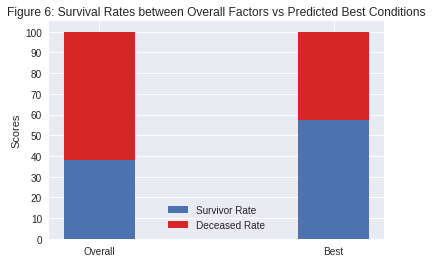

In [27]:
#n number of graphs
n = 2

#Get necessary values
best = tuple(best_survival_rate.values)
overall = (overall_survival_rate * 100, overall_deceased_rate * 100)

#Stack the graph in a right way
temp1 = (overall[1], best[0])
temp2 = (overall[0], best[1])

ind = np.arange(2)    # the x locations for the groups
width = 0.3       # the width of the bars: can also be len(x) sequence

#Draw the stack bar chart graph
p1 = plt.bar(ind, temp2, width)
p2 = plt.bar(ind, temp1, width, color='#d62728', bottom=temp2)

#Insert legend with color coding for information
plt.ylabel('Scores')
plt.title('Figure 6: Survival Rates between Overall Factors vs Predicted Best Conditions')
plt.xticks(ind, ('Overall', 'Best'))
plt.yticks(np.arange(0, 105, 10))
plt.legend((p1[0], p2[0]), ('Survivor Rate', 'Deceased Rate'))

plt.show()

The overall survival rate from the data set is 38%. From the sample group which has picked in consideration of the best possible condtions to survive, it has showed about 57% in the rate. As the figure 6 shows, the simple heuristic value in each factor increases the rate of survival(blue area) significantly.

In my analysis, chi-squared test has been used to check the difference between the overall survivor rate and a specific factor's survivor rate. Throughout the research, I have realized that the test is mainly focused on proving each group is different or same in a certain significance level. In my case, all factors have showed significant difference between overall survivor rates, but it is hard to say that a single factor has caused the change in the rate. Also, the 891 records from the dataset are part of the passengers data from Titanic. Therefore, the best condtions above are my prediction from the sample data that might not represent the whole population. 

With my findings from Titanic sample, I can find different dataset from different incident that shares similiar conditions with Titanic. By doing similar test with each factor in different incident, I can analyze factors which actually showed higher survivor rate in the incident. By expanding the dataset in different incidents, it will help to find how different factors can affect the survivor rate. 